**1. What is a Decision Tree?**


A decision tree is a supervised learning algorithm used to make decisions based on the values of different features. It operates by splitting data into subsets, making a series of decisions at each node in the tree. The goal is to divide the data into branches (sub-nodes) based on a rule, ultimately ending in a leaf node which represents the predicted outcome.

Root Node: The beginning of the tree, where the first split happens.
Decision Nodes: Nodes where the data is split further based on a rule.
Leaf Nodes: Nodes where no further splits are possible, representing the final decision.



**2. Mechanism of a Decision Tree**
Splitting: The tree starts with a root node, which is split based on a decision rule.
Feature Selection: The features are evaluated to determine which will give the best split. A common measure used for this is Information Gain
Pruning: The tree is pruned to prevent overfitting. Overfitting occurs when the tree becomes too complex and starts capturing noise rather than patterns in the data.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [14]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [16]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train , y_test=train_test_split(x_scaled, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)


In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[107  44]
 [ 25  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

Accuracy Score:
0.7012987012987013


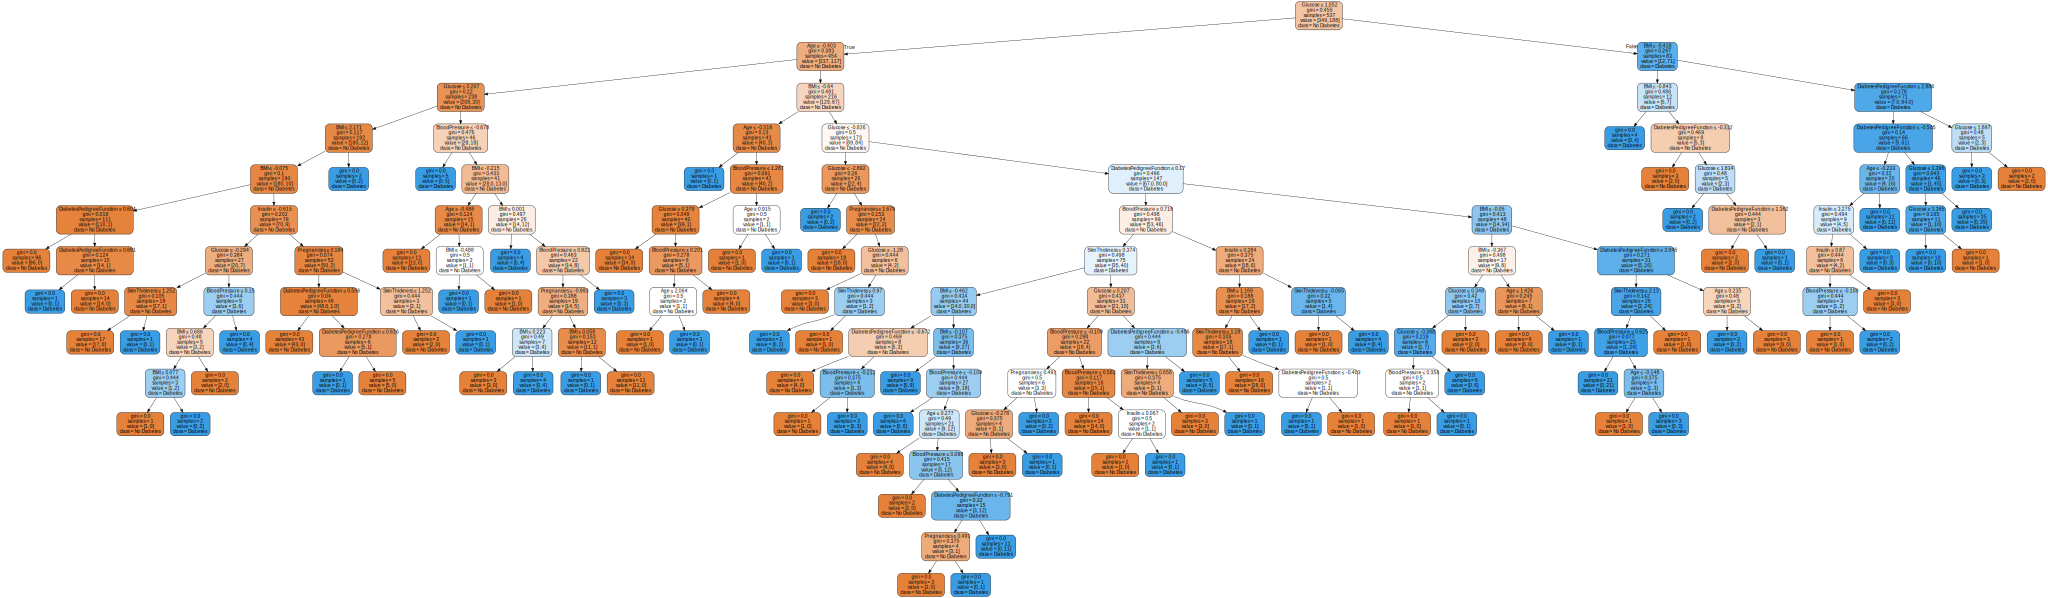

In [30]:
from sklearn.tree import export_graphviz
import graphviz

# Assuming X is your feature dataframe and model is your trained DecisionTreeClassifier
feature_names = X.columns

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=feature_names,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    special_characters=True  # Fixed typo: was 'special_caharacters'
)

# Create and save the graph
graph = graphviz.Source(dot_data)
graph.render('/content/diabetes_tree', view=True)
graph
